Leggo file e definisco variabili

In [7]:
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf # Neural Network builder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten

all_data = pd.read_csv("G:\My Drive\Datasets\data_per10.csv")

# 'all_data' contiene 10 array (classi) da 8000 elementi: 80000 elementi
print("Shape of concatenated data:", all_data.shape)

Shape of concatenated data: (80000, 785)


In [8]:
classes = {0:'airplane',
           1: 'cactus',
           2: 'clock',
           3: 'door',
           4: 'fork',
           5: 'ice cream',
           6: 'lollipop',
           7: 'octopus',
           8: 'pencil',
           9: 'umbrella'}

In [9]:
from sklearn.model_selection import train_test_split

y = all_data.iloc[:, 0]  # 1a colonna: labels
x = all_data.iloc[:, 1:] # tutte le colonne tranne la 1a
x = x.to_numpy()
y = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Normalizzo i dati di input per assicurare che le feature siano su una scala simile per un addestramento + stabile ed efficiente
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train.shape, x_test.shape)

(56000, 784) (24000, 784)


CNN (Convolutional Neural Network) per 10 classi

In [10]:
from tensorflow.keras import layers

# CNN model
def create_model():
    model = tf.keras.models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(784,)))
    model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Grafici Accuracy e Loss

Epoch 1/30
1750/1750 [==============================] - 39s 21ms/step - loss: 0.6447 - accuracy: 0.7976 - val_loss: 0.3277 - val_accuracy: 0.9049
Epoch 2/30
1750/1750 [==============================] - 38s 22ms/step - loss: 0.3473 - accuracy: 0.8961 - val_loss: 0.2703 - val_accuracy: 0.9222
Epoch 3/30
1750/1750 [==============================] - 37s 21ms/step - loss: 0.2911 - accuracy: 0.9143 - val_loss: 0.2433 - val_accuracy: 0.9285
Epoch 4/30
1750/1750 [==============================] - 37s 21ms/step - loss: 0.2637 - accuracy: 0.9223 - val_loss: 0.2258 - val_accuracy: 0.9342
Epoch 5/30
1750/1750 [==============================] - 36s 21ms/step - loss: 0.2444 - accuracy: 0.9277 - val_loss: 0.2152 - val_accuracy: 0.9374
Epoch 6/30
1750/1750 [==============================] - 37s 21ms/step - loss: 0.2284 - accuracy: 0.9325 - val_loss: 0.2164 - val_accuracy: 0.9369
Epoch 7/30
1750/1750 [==============================] - 35s 20ms/step - loss: 0.2183 - accuracy: 0.9358 - val_loss: 0.2040 -

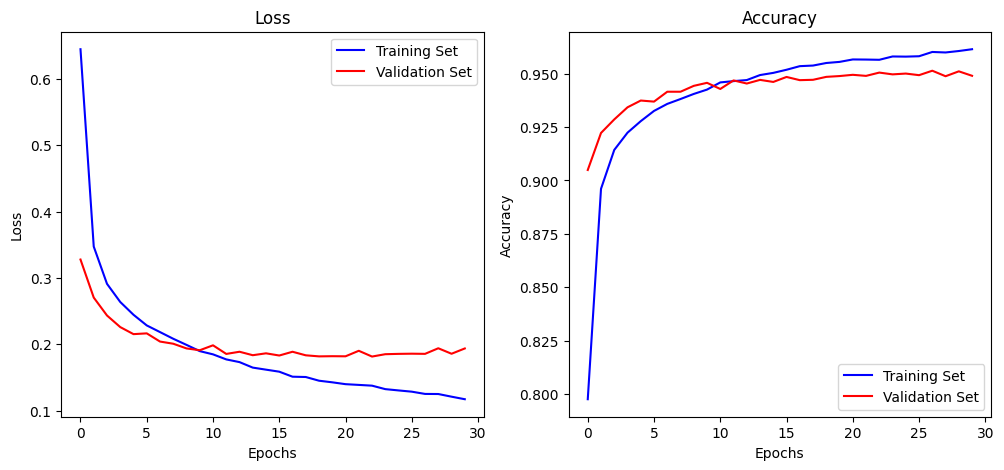

In [11]:
import matplotlib.pyplot as plt

model = create_model()
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

# Estraggo training/validation loss e accuracy da history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Set', color='blue')
plt.plot(validation_loss, label='Validation Set', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Set', color='blue')
plt.plot(validation_accuracy, label='Validation Set', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.show()

In [12]:
model.save('Quick,Draw!10.h5')

c:\Users\tomma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from tensorflow.keras.models import load_model
model = load_model('Quick,Draw!10.h5')

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Final validation loss:",loss)
print("Final validation accuracy:",accuracy)

750/750 [==============================] - 5s 6ms/step - loss: 0.1936 - accuracy: 0.9490
Final validation loss: 0.19362618029117584
Final validation accuracy: 0.9489583373069763


Stats (classification_report, confusion_matrix)

750/750 [==============================] - 4s 5ms/step
Accuracy: 0.9489583333333333
Classification report:
               precision    recall  f1-score   support

    airplane       0.88      0.96      0.92      2387
      cactus       0.94      0.90      0.92      2388
       clock       0.98      0.98      0.98      2339
        door       0.98      0.97      0.98      2416
        fork       0.95      0.90      0.93      2476
   ice cream       0.96      0.97      0.96      2389
    lollipop       0.96      0.94      0.95      2404
     octopus       0.95      0.95      0.95      2378
      pencil       0.92      0.96      0.94      2400
    umbrella       0.97      0.96      0.96      2423

    accuracy                           0.95     24000
   macro avg       0.95      0.95      0.95     24000
weighted avg       0.95      0.95      0.95     24000

Confusion Matrix:
 [[2290   23    4    3    8    5    2   29   14    9]
 [  89 2148    8   18   36   33    5   27   16    8]
 [  12  

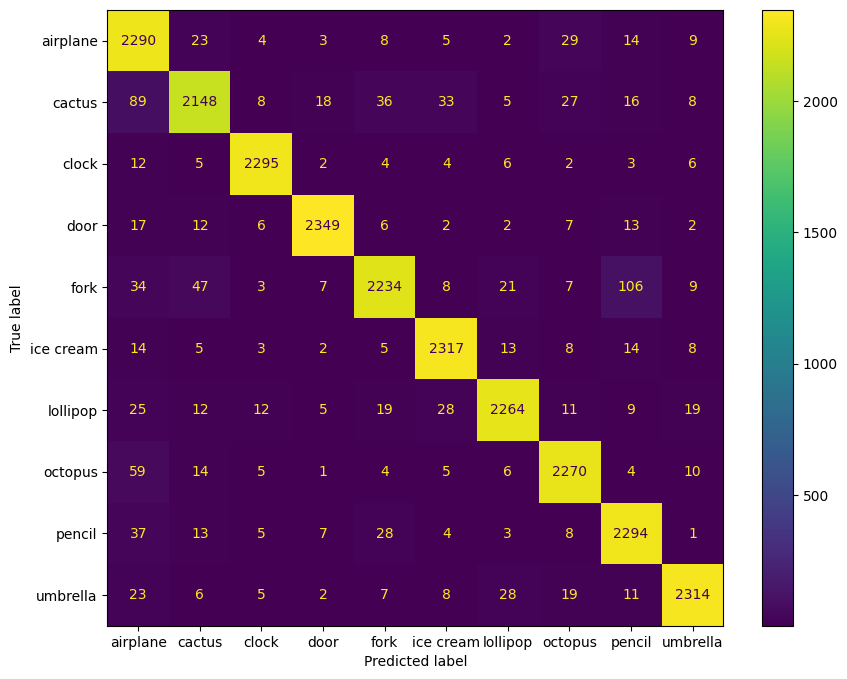

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay


# output array (predizioni)
predictions = model.predict(x_test)
y_pred = [np.argmax(prediction) for prediction in predictions]

# Nomi classi
y_test_names = [classes[i] for i in y_test]
y_pred_names = [classes[i] for i in y_pred]

# prediction info (one hot encoding)
def y_pred_ohe(i):
  example = predictions[i]
  normalized_example = np.array(example) / np.sum(example)
  for j in normalized_example:
     print("{:.10f}".format(j * 100))
  print("Label:",y_test[i])

# stats
def stats(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test, y_pred))
  print("Classification report:\n", classification_report(y_test_names, y_pred_names))
  # Plotto la confusion matrix
  cm = confusion_matrix(y_test_names, y_pred_names)
  print("Confusion Matrix:\n",cm)
  plt.figure(figsize=(10, 8))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.values())
  disp.plot(ax=plt.gca())  # passo l'asse corrente (ax) al display
plt.show()

stats(y_test,y_pred)

1a immagine del test set

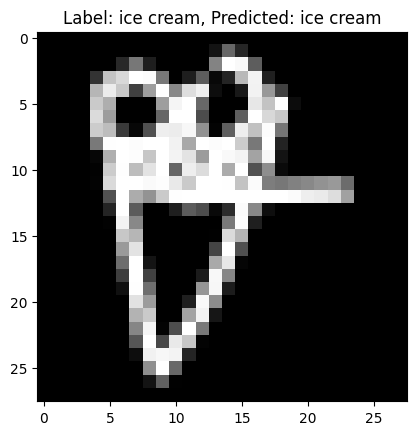

In [16]:
def image(i):
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
  plt.title(f"Label: {y_test_names[i]}, Predicted: {y_pred_names[i]}")
  plt.show()

image(0) # printo la 1a immagine del test set

Prime 16 immagini del test set

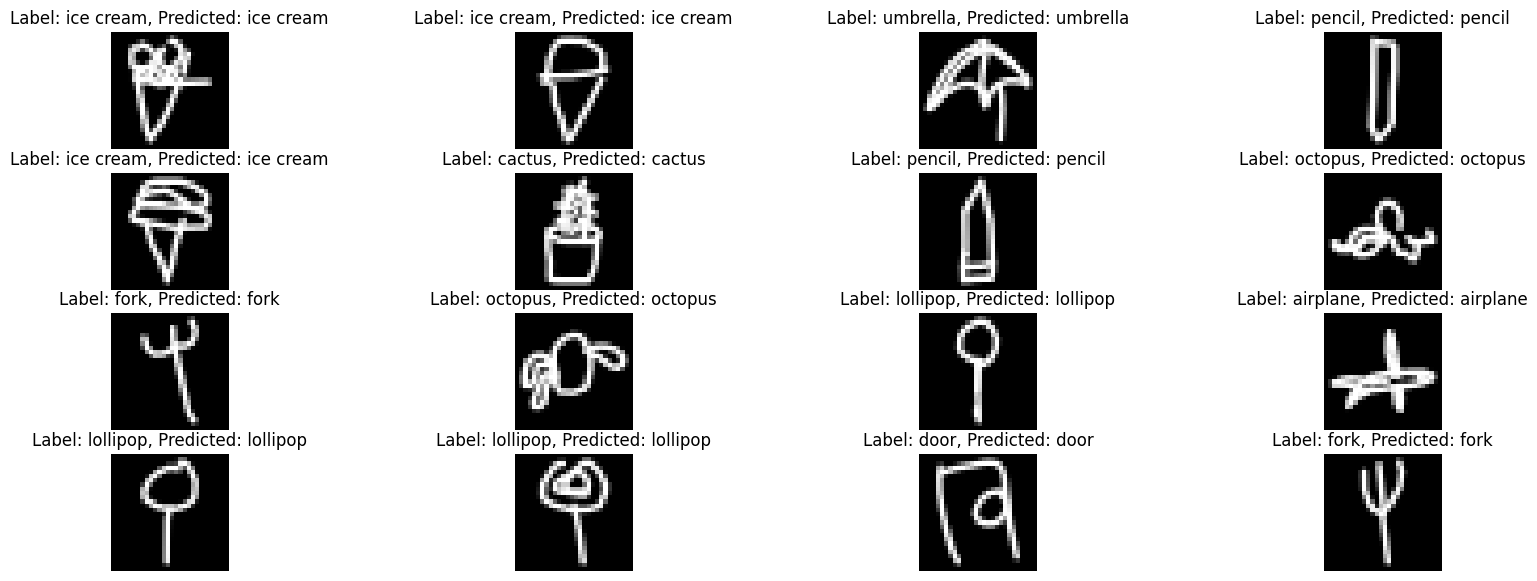

In [17]:
def firstImages(i):
    rows = 4
    cols = 4
    images_to_show = x_test[:i].reshape(-1, 28, 28)
    titles = [f"Label: {y_test_names[j]}, Predicted: {y_pred_names[j]}" for j in range(i)]

    fig, axes = plt.subplots(rows, cols, figsize=(20, 7))
    for j, ax in enumerate(axes.flat):
        ax.imshow(images_to_show[j], cmap='gray')
        ax.set_title(titles[j])
        ax.axis('off')
    plt.show()
firstImages(16) # printo le prime 16 immagini del test set

Primi 16 errori del modello nella fase di test

1225 errori su 24000 immagini totali


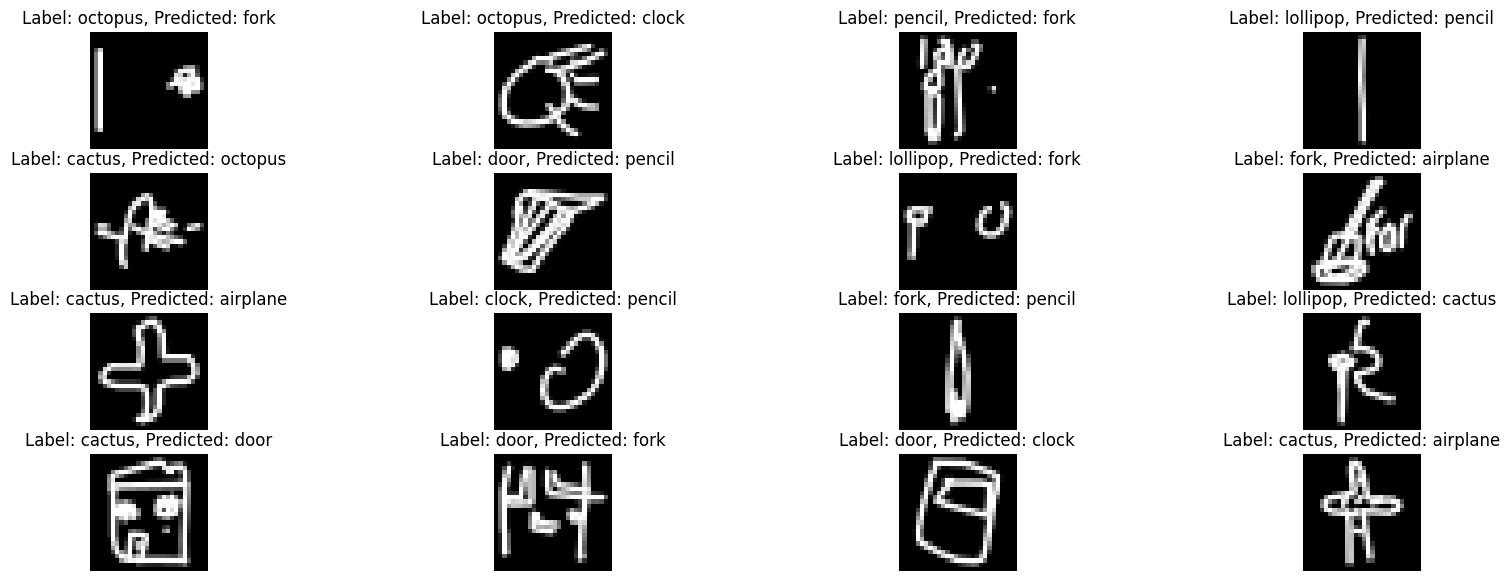

In [18]:
def firstMistakes(i):
    # Trovo tutti gli indici delle immagini misclassified
    misclassified_indices = np.where(y_test != y_pred)[0]
    print(misclassified_indices.shape[0], "errori su", y_test.shape[0], "immagini totali")

    # Display the randomly selected misclassified images
    rows = int(np.sqrt(i))
    cols = i // rows

    images_to_show = x_test[misclassified_indices[:i]].reshape(-1, 28, 28)
    titles = [f"Label: {y_test_names[j]}, Predicted: {y_pred_names[j]}" for j in misclassified_indices[:i]]

    fig, axes = plt.subplots(rows, cols, figsize=(20, 7))
    for j, ax in enumerate(axes.flat):
        ax.imshow(images_to_show[j], cmap='gray')
        ax.set_title(titles[j])
        ax.axis('off')
    plt.show()

firstMistakes(16) # printo 16 immagini che sono state classificate male dal modello

Interfaccia Grafica per le predizioni Real-Time (è solo per 10 classi, ma proprio per questo è più precisa)

In [21]:
import tkinter as tk
from tkinter import Canvas, Button, Label, Frame
from PIL import Image, ImageDraw, ImageOps
import numpy as np

# Creo una window
window = tk.Tk()
window.title("Real-Time Digit Recognition")

# Dimensioni canvas (+ grande così disgenare è + facile)
canvas_width = 280
canvas_height = 280

# Creo canvas
canvas = Canvas(window, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()


# Display della predizione
label = Label(window, text="Prediction: None", font=("Helvetica", 16))
label.pack()

# Frame della tabella delle predizioni
prediction_frame = Frame(window)
prediction_frame.pack()

# Clear function (resetta il canvas, anche le predizioni)
def clear_canvas(canvas):
    canvas.delete("all")
    label.config(text="Prediction: None")
    update_prediction_table(None)  # Clear the prediction table

# Function di update della prediction table: stampa la top 10 delle predizioni
def update_prediction_table(predictions, num_classes=10):
    for widget in prediction_frame.winfo_children():
        widget.destroy()

    if predictions is not None:
        # Sort predictions in ordine decrescente
        sorted_indices = np.argsort(predictions)[::-1]

        # Display the top N predictions
        for i in range(num_classes):
            class_index = sorted_indices[i]
            class_name = classes[class_index]
            probability = predictions[class_index]
            text = f"{class_name}: {probability * 100:.2f}%"
            prediction_label = Label(prediction_frame, text=text, font=("Helvetica", 12))
            prediction_label.pack()


# Function di predict della classe giusta
def predict_drawing():
    # Salvo il contenuto del canvas come un'immagine
    canvas.postscript(file="tmp.eps", colormode="mono")
    img = Image.open("tmp.eps")

    # Converto in grayscale
    img = img.convert("L")

    # Resize a 28x28 pixels, così img è interpretabile dal modello
    img = img.resize((28, 28), Image.LANCZOS)

    # Inverto img (sfondo nero, disegno bianco)
    img = ImageOps.invert(img)

    # Flattening e normalization
    img_array = np.array(img).reshape(1, 784) / 255.0

    # Prediction vera e propria
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = classes[predicted_class_index]

    # Aggiorno tabella
    label.config(text=f"Prediction: {predicted_class_name}")

    update_prediction_table(prediction[0])

# Variabili che indicano se l'user sta disegnando, o se la gomma è attiva
drawing = False
eraser = False

# Function che si attiva se l'user clicca o tiene premuto col mouse
def start_drawing(event):
    global drawing
    drawing = True
    x, y = event.x, event.y
    if eraser:
        canvas.create_rectangle(x - 10, y - 10, x + 10, y + 10, fill='white', outline='white') # per gomma
    else:
        canvas.create_oval(x - 5, y - 5, x + 5, y + 5, fill='black') # per matita

# Function che si attiva  se l'user muove il mouse mentre tiene premuto
def draw(event):
    if drawing:
        x, y = event.x, event.y
        if eraser:
            canvas.create_rectangle(x - 10, y - 10, x + 10, y + 10, fill='white', outline='white')
        else:
            canvas.create_oval(x - 5, y - 5, x + 5, y + 5, fill='black')

# Function per quando l'user rilascia il mouse, e printa la predizione
def stop_drawing(event):
    global drawing
    drawing = False
    predict_drawing()

# Function della gomma (ON/OFF)
def toggle_eraser():
    global eraser
    eraser = not eraser
    eraser_button.config(text="Eraser On" if eraser else "Eraser Off")

# Bind (associo) il tasto sx (B1) del mouse al disegnare
canvas.bind("<Button-1>", start_drawing)
canvas.bind("<B1-Motion>", draw)
canvas.bind("<ButtonRelease-1>", stop_drawing)

# Creo clear button
clear_button = Button(window, text="Clear", command=lambda: clear_canvas(canvas))
clear_button.pack()

# Creo toggle eraser button
eraser_button = Button(window, text="Eraser Off", command=toggle_eraser)
eraser_button.pack()

window.mainloop() # il main di Tkinter


1/1 [==============================] - 0s 21ms/step
